<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/Bayesian_Inference_and_the_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a use case using the MNIST dataset and Implement a Bayes Classifier or KNN to recognize handwritten numbers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## Data input

In [3]:
import io
data = pd.read_csv("/content/drive/MyDrive/MNIST_train.csv")
data.head()
# Dataset is now stored in a Pandas Dataframe

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Cleaning the data, removing "Unnamed" and "index" column
data.drop(['Unnamed: 0', 'index'], inplace=True, axis=1)


In [5]:
# Displaying the data 
data

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Describe data
data.describe()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [9]:
#Changing the dataframe into a numpy file
npdata = data.to_numpy()
npdata

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [13]:
y = npdata[:,0]
y.shape

(60000,)

In [15]:
X = npdata[:,1:]
X.shape

(60000, 784)

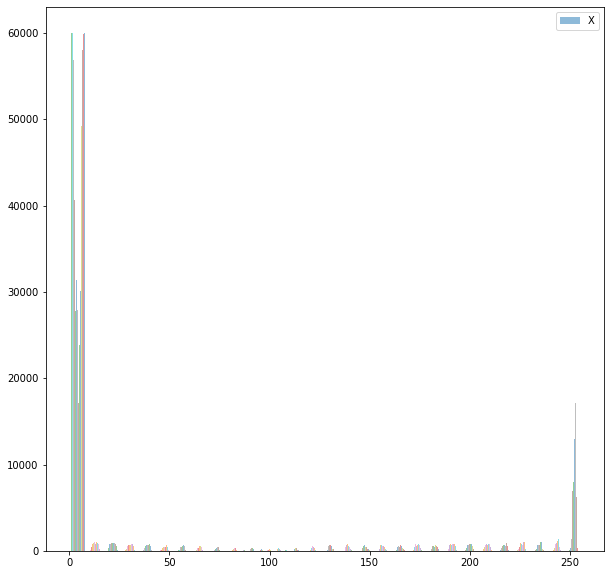

In [16]:
plt.figure(figsize=(10,10))
plt.hist(X, label = "X", alpha = 0.5 , bins = 30)
plt.legend()

## Naive Bayes Classifier

In [17]:
class GaussNB():
  #self is a variable that gives value to every method in the class

  def fit(self ,X ,y ,epsilon = 1e-3):
    self.likelyhoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[ y==k , :]
      self.likelyhoods[k] = {"mean" : X_k.mean(axis = 0), "cov": X_k.var(axis=0) + epsilon}
      self.priors[k] = len(X_k) / len(X)



  def predict(self, X):

    N , d = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k,l in self.likelyhoods.items():
      #Bayes Theorem computation
      P_hat[:,k] = mvn.logpdf(X, l["mean"] , l["cov"]) + np.log(self.priors[k])

    return P_hat.argmax(axis=1)


In [18]:
def accuracy(y , y_hat):
  return np.mean(y==y_hat)

In [19]:
gnb = GaussNB()

In [20]:
gnb.fit(X,y)

In [21]:
#Test data
Test1 = pd.read_csv("/content/drive/MyDrive/MNIST_test (1).csv")

In [22]:
Test1.drop(['Unnamed: 0', 'index'], inplace=True, axis=1)
test1 = Test1.to_numpy()


In [23]:
X1 = test1[:,1:]
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
Y1 = test1[:,0]
Y1

array([7, 2, 1, ..., 4, 5, 6])

In [25]:
y_hat = gnb.predict(X1)

In [26]:
#Training Accuracy for Naive Bayes
accuracy(Y1 , y_hat)

0.5878

## Non Naive Gauss Bayes Classifier

In [27]:
class GaussBayes():

  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors =dict()

    self.K = set(y.astype(int))

    for k in self.K:

      X_k = X[y==k,:]
      N_k,D = X_k.shape
      mu_k =X_k.mean(axis=0)
      self.likelihoods[k] = {"mean":X_k.mean(axis=0),
                             "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)

  def predict(self, X):

    N, D  = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k , l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"],l["cov"])+np.log(self.priors[k])


    return P_hat.argmax(axis=1)

In [28]:
gbayes = GaussBayes()

In [29]:
gbayes.fit(X , y)


In [30]:
y_hat2 = gbayes.predict(X1)

In [31]:
accuracy(Y1, y_hat2)

0.7532

## KNN Classifier

In [32]:
class KNNClassifier():

  def fit(self, X, y):
    self.X = X
    self.y = y


  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)
      idxt  = np.argsort(dist2)[:K]
      gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()


    return y_hat

In [33]:
knn = KNNClassifier()

In [34]:
knn.fit(X,y)

In [36]:
y_hat3 = knn.predict(X1,10)

In [37]:
accuracy(Y1,y_hat3)

0.9684